In [13]:
# note: fdfdpy_OO must be in your JUPYTER_PATH for this import to work (or you can manually add it to path with some google=able code.)
from FDFD.Fdfd import Fdfd
from nonlinear_solvers import born_solve, newton_solve
from optimization import run_optimization

import numpy as np
import matplotlib.pylab as plt
import scipy.sparse as sp

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
omega = 5e14                # angular frequency (2pi)
dl = 1e-7                   # grid size (m)
eps_r = np.ones((100,100))  # relative permittivity
eps_r[40:60, 40:60] = 5     # define box
NPML = [10, 10]             # number of pml grid points on x and y borders
pol = 'Ez'                  # polarization (either 'Hz' or 'Ez')

In [15]:
# sets simulation variables, constructs system matrix 'A', stored in 'simulation' object
simulation = Fdfd(omega,eps_r,dl,NPML,pol)

In [16]:
# set source and solve for electromagnetic fields
b = np.zeros((simulation.Nx,simulation.Ny))
b[40:60,30] = 1
(Hx,Hy,Ez) = simulation.solve_fields(b)

/anaconda3/envs/rasa/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


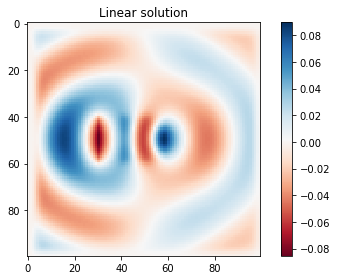

In [17]:
# plot
plt.imshow(np.real(Ez), cmap='RdBu')
plt.colorbar()
plt.title('Linear solution')
plt.show()

In [50]:
n2 = 10                         # Nonlinearity strength
nl_region = np.zeros(eps_r.shape)  # Nonliearity region
nl_region[40:60, 40:60] = 1
Nstep = 100                         # Number of steps for iterative solution
# Define nonlinear function
nonlinear_fn = lambda e: n2*np.square(np.abs(e))

In [52]:
eps_max = 10
Nsteps = 100
measure_pt = np.zeros(eps_r.size)
measure_pt[50, 80] = 1
obj_fn = lambda e: np.square(np.abs(e))*measure_pt
design_region = np.array(eps_r > 1).astype(int)

[0. 0. 0. ... 0. 0. 0.]


IndexError: too many indices for array

In [48]:
obj_fns = run_optimization(simulation, b, nonlinear_fn, obj_fn, nl_region, design_region, Nsteps, eps_max, solver='born', step_size=0.2)

\ |                                             #    | 58 Elapsed Time: 0:00:25

KeyboardInterrupt: 

/anaconda3/envs/rasa/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


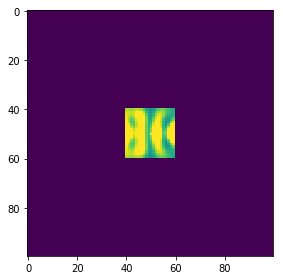

In [45]:
plt.imshow(simulation.eps_r)

/anaconda3/envs/rasa/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


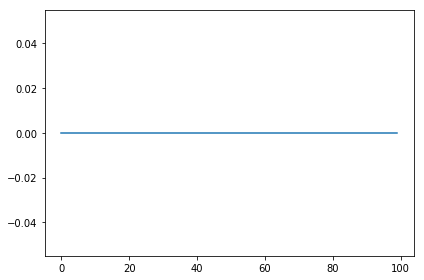

In [46]:
plt.plot(obj_fns)